In [1]:
!pip install xgboost --quiet

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

# RANDOM_STATE = 55

In [3]:
df=pd.read_csv('heart.csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### One-hot encoding using Pandas

In [6]:
cat_variables = ['Sex',
'ChestPainType',
'RestingECG',
'ExerciseAngina',
'ST_Slope'
]

In [7]:
df = pd.get_dummies(data = df,
                         prefix = cat_variables,
                         columns = cat_variables)

In [8]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [9]:
var = [x for x in df.columns if x not in 'HeartDisease']

In [10]:
print(len(var))

20


In [11]:
print(df[var[0]].iloc[0])

40


In [12]:
df[var].head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,False,True,False,False,True,False,False,True,False,True,False,False,False,True


### Splitting the Dataset

In [14]:
x_train, x_test,y_train, y_test=train_test_split(df[var], df['HeartDisease'], train_size = 0.8, random_state = 10)

In [15]:
print(f'train samples: {len(x_train)}\ntest samples: {len(x_test)}')
print(f'target proportion: {int(sum(y_train))/int(len(y_train)):.4f}')

train samples: 734
test samples: 184
target proportion: 0.5586


In [16]:
print(f"x shape: {df[var].shape}")
print(f"y shape: {df['HeartDisease'].shape}")


x shape: (918, 20)
y shape: (918,)


### Calculate entropy

In [33]:
import math
def calculate_entropy(y):
    entropy=0
    if len(y):
        p1=len(y[y==1])/len(y)
        if p1!=0 and p1!=1:
            entropy=(-p1*(math.log2(p1)))-(1-p1)*(math.log2(1-p1))
    return entropy

In [19]:
def compute_entropy(y):
    """
    Computes the entropy for 
    
    Args:
       y (ndarray): Numpy array indicating whether each example at a node is
           edible (`1`) or poisonous (`0`)
       
    Returns:
        entropy (float): Entropy at that node
        
    """
    # You need to return the following variables correctly
    entropy = 0.
    
    ### START CODE HERE ###
    if len(y) != 0:
        p1 = len(y[y==1])/len(y)
        if p1 != 0 and p1 != 1:
            entropy = -p1*np.log2(p1)-(1-p1)*np.log2(1-p1)
        else:
            entropy = 0
    ### END CODE HERE ###        
    
    return entropy

In [35]:
print("Entropy at root node: ", calculate_entropy(y_train)) 



Entropy at root node:  0.990074615606358


In [ ]:
print("Entropy at root node: ", compute_entropy(y_train)) 

In [37]:
def split_dataset(X, node_indices, feature):
    left_indices = []
    right_indices = []
    for i in node_indices:
        if X.iloc[i, feature] == 55:  # Use .iloc for DataFrame indexing
            left_indices.append(i)
        else:
            right_indices.append(i)
    return left_indices, right_indices


In [39]:
root_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Feel free to play around with these variables
# The dataset only has three features, so this value can be 0 (Brown Cap), 1 (Tapering Stalk Shape) or 2 (Solitary)
feature = 1

left_indices, right_indices = split_dataset(x_train, root_indices, feature)

print("Left indices: ", left_indices)
print("Right indices: ", right_indices)



Left indices:  []
Right indices:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
x_train.head(5)

# Building the Models

#### Decision Tree

In [41]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]

In [43]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")


x_train shape: (734, 20)
y_train shape: (734,)


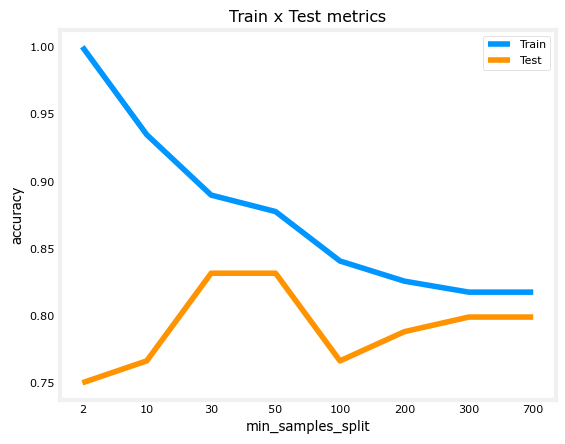

In [45]:
accuracy_list_train = []
accuracy_list_test = []
from sklearn.tree import DecisionTreeRegressor
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = 10).fit(x_train,y_train) 
    predictions_train = model.predict(x_train) ## The predicted values for the train dataset
    predictions_test = model.predict(x_test) ## The predicted values for the test dataset
    
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

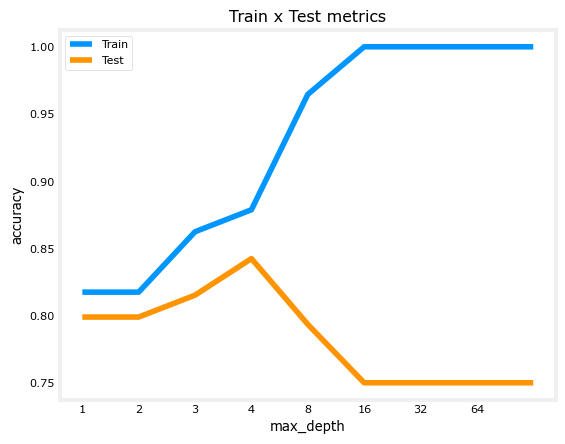

In [47]:
accuracy_list_train = []
accuracy_list_test = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = 10).fit(x_train,y_train) 
    predictions_train = model.predict(x_train) ## The predicted values for the train dataset
    predictions_test = model.predict(x_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

decision_tree_model = DecisionTreeClassifier(min_samples_split = 50,
                                             max_depth = 3,
                                             random_state = 10).fit(x_train,y_train)

In [25]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(x_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(x_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.8624
Metrics test:
	Accuracy score: 0.8152


#### random forest

In [54]:
n_estimators_list = [10,50,100,500]
RANDOM_STATE=10

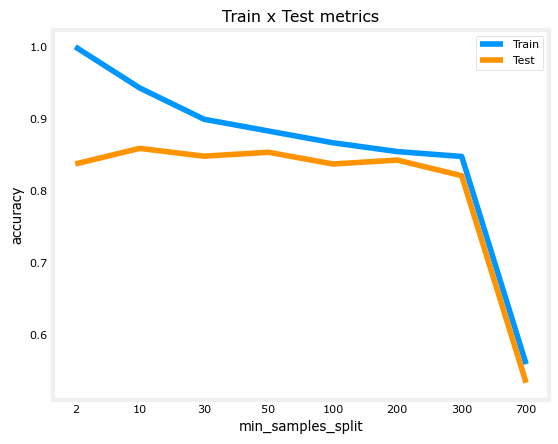

In [58]:
accuracy_list_train = []
accuracy_list_test = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(x_train,y_train) 
    predictions_train = model.predict(x_train) ## The predicted values for the train dataset
    predictions_test = model.predict(x_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

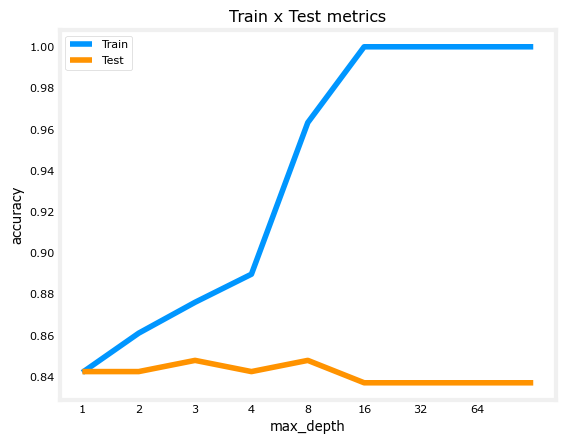

In [62]:
accuracy_list_train = []
accuracy_list_test = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(x_train,y_train) 
    predictions_train = model.predict(x_train) ## The predicted values for the train dataset
    predictions_test = model.predict(x_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

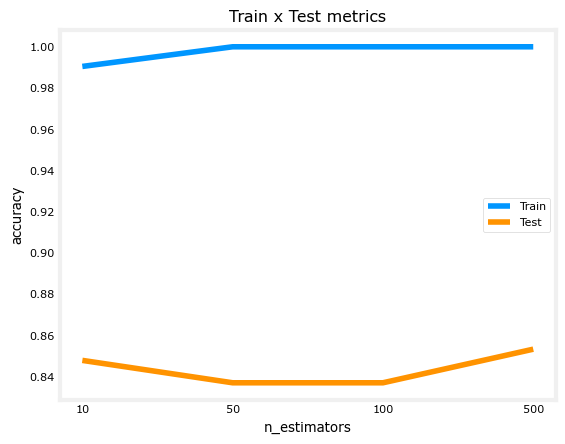

In [66]:
accuracy_list_train = []
accuracy_list_test = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(x_train,y_train) 
    predictions_train = model.predict(x_train) ## The predicted values for the train dataset
    predictions_test = model.predict(x_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

In [70]:
random_forest_model = RandomForestClassifier(n_estimators = 100,
                                             max_depth = 8, 
                                             min_samples_split = 10).fit(x_train,y_train)

In [74]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(x_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(x_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9278
Metrics test:
	Accuracy score: 0.8696


In [76]:
random_forest_model = RandomForestClassifier(n_estimators = 100,
                                             max_depth = 10, 
                                             min_samples_split = 10).fit(x_train,y_train)

In [78]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(x_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(x_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9387
Metrics test:
	Accuracy score: 0.8533


In [80]:
random_forest_model = RandomForestClassifier(n_estimators = 50,
                                             max_depth = 10, 
                                             min_samples_split = 10).fit(x_train,y_train)

In [82]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(x_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(x_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9387
Metrics test:
	Accuracy score: 0.8750


In [84]:
random_forest_model = RandomForestClassifier(n_estimators = 10,
                                             max_depth = 8, 
                                             min_samples_split = 10).fit(x_train,y_train)

In [86]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(x_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(x_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9319
Metrics test:
	Accuracy score: 0.8696


#### XGBoost

In [89]:
n = int(len(x_train)*0.8) 

In [91]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = x_train[:n], x_train[n:], y_train[:n], y_train[n:]

In [101]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state = RANDOM_STATE)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-logloss:0.63735
[1]	validation_0-logloss:0.60205
[2]	validation_0-logloss:0.57320
[3]	validation_0-logloss:0.54758
[4]	validation_0-logloss:0.52364
[5]	validation_0-logloss:0.50584
[6]	validation_0-logloss:0.49010
[7]	validation_0-logloss:0.47600
[8]	validation_0-logloss:0.46532
[9]	validation_0-logloss:0.45368
[10]	validation_0-logloss:0.44386
[11]	validation_0-logloss:0.43399
[12]	validation_0-logloss:0.42639
[13]	validation_0-logloss:0.41967
[14]	validation_0-logloss:0.41370
[15]	validation_0-logloss:0.40686
[16]	validation_0-logloss:0.40195
[17]	validation_0-logloss:0.39872
[18]	validation_0-logloss:0.39590
[19]	validation_0-logloss:0.39375
[20]	validation_0-logloss:0.39184
[21]	validation_0-logloss:0.38847
[22]	validation_0-logloss:0.38621
[23]	validation_0-logloss:0.38454
[24]	validation_0-logloss:0.38254
[25]	validation_0-logloss:0.38092
[26]	validation_0-logloss:0.37928
[27]	validation_0-logloss:0.37961
[28]	validation_0-logloss:0.37948
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=10, ...)

In [103]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(x_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(x_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9673
Metrics test:
	Accuracy score: 0.8424
